### Python interop Part2

This is the second part of the demo, make sure to have excuted Python interop Part1 first. This opens the data saved by the Julia interface using xarray and afterwards computes a spatial mean and plots the time series of the selected variables. 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_zarr("../Julia/data/cube_nomsc/", consolidated=False)

In [7]:
ds

<xarray.Dataset>
Dimensions:                            (lat: 23, lon: 41, time: 782)
Coordinates:
  * lat                                (lat) float64 54.62 54.38 ... 49.38 49.12
  * lon                                (lon) float64 14.12 14.38 ... 23.88 24.12
  * time                               (time) datetime64[ns] 2001-01-05 ... 2...
Data variables:
    gross_primary_productivity         (lat, lon, time) float32 dask.array<chunksize=(23, 41, 782), meta=np.ndarray>
    net_ecosystem_exchange             (lat, lon, time) float32 dask.array<chunksize=(23, 41, 782), meta=np.ndarray>
    terrestrial_ecosystem_respiration  (lat, lon, time) float32 dask.array<chunksize=(23, 41, 782), meta=np.ndarray>

In [3]:
f = ds.mean(dim=('lon','lat')).to_dataframe()

In [17]:
f

,gross_primary_productivity,net_ecosystem_exchange,terrestrial_ecosystem_respiration
time,,,
2001-01-05,0.025165,0.008665,0.070099
2001-01-13,0.000225,-0.019934,-0.014165
2001-01-21,0.012347,-0.011873,0.023418
2001-01-29,0.139265,0.026002,0.182248
2001-02-06,-0.028431,-0.031242,-0.051483
...,...,...,...
2017-11-29,-0.026726,-0.039372,-0.085679
2017-12-07,0.036724,-0.002535,0.054060
2017-12-15,0.051070,0.002506,0.064722


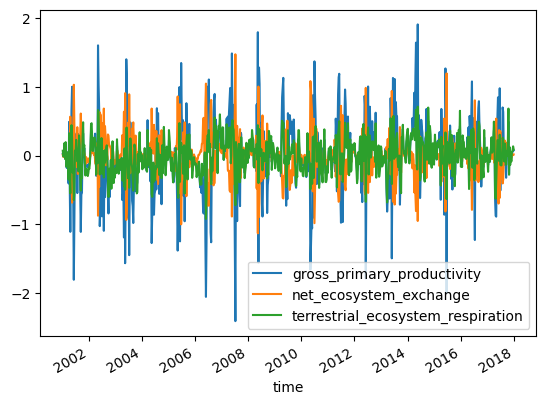

In [7]:
#f.groupby("Variable").plot()
f.plot()
plt.show()

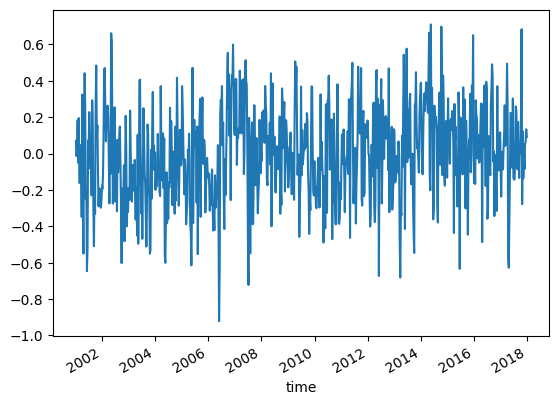

In [9]:
f.terrestrial_ecosystem_respiration.plot()
plt.show()
